# Statistical Analysis for the Echoes of Humanity Paper

## Imports and Plot Configs

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [111]:
# 3.3 polegadas de largura, 1.65 * isso (golden ratio) altura
plt.rcParams['figure.figsize'] = (3.3, 3.3  / 1.65)

plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 15

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 5

## Initial Section on Good Answers

In [112]:
df = pd.read_csv('answers-july03rd/raw-answers-jul30.csv', index_col=1)
df = df.drop('Unnamed: 0', axis='columns')
df['uuid_order'] = df.groupby('uuid').cumcount() + 1

sorted_pairs = df[['track_A', 'track_B']].apply(lambda row: tuple(sorted([row['track_A'], row['track_B']])), axis=1)

# Assign a unique ID
df['pair_id'] = pd.factorize(sorted_pairs)[0]

len(set(df['uuid']))

653

In [113]:
df

,uuid,track_A,track_B,human_perception,comments,is_last_response,time_spent,timestamp,song_recognition,uuid_order,pair_id
id,,,,,,,,,,,
9f8771eb-3afc-4554-85ef-dd3b62c66b66,deeab0e6-ad56-4510-95f4-897464951a82,audios/random/emkwtysd.mp3,audios/random/rycsunu2.mp3,NaN,NaN,False,NaN,2025-06-10 00:43:36.981286,NaN,1,0
1662145b-7247-4d7d-a291-3de5d6c111c9,deeab0e6-ad56-4510-95f4-897464951a82,audios/rq1/par7/znxd2wka.mp3,audios/rq1/par7/2dyp2m8k.mp3,NaN,NaN,False,NaN,2025-06-10 00:43:36.981286,NaN,2,1
8604136e-c9af-43b9-97f2-c0d5ceafb84a,deeab0e6-ad56-4510-95f4-897464951a82,audios/rq1/par6/6sdqefhc.mp3,audios/rq1/par6/l11vtp2a.mp3,NaN,NaN,False,NaN,2025-06-10 00:43:36.981286,NaN,3,2
3ae53ca2-0ed2-432f-8fbc-13c3c9e2321e,deeab0e6-ad56-4510-95f4-897464951a82,audios/random/xxzmx3db.mp3,audios/random/ps97lti8.mp3,NaN,NaN,False,NaN,2025-06-10 00:43:36.981286,NaN,4,3
eafea70c-faf1-44b7-b47f-a8dedb3728d9,deeab0e6-ad56-4510-95f4-897464951a82,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,NaN,NaN,False,NaN,2025-06-10 00:43:36.981286,NaN,5,4
...,...,...,...,...,...,...,...,...,...,...,...
602767b5-a20c-48b1-a1fd-640235b1f9ec,38bf2a5c-763b-4978-adc9-b6608d5b270b,audios/rq1/par4/jfxaxuvc.mp3,audios/rq1/par4/amsg72l5.mp3,2.0,NaN,False,234568.0,2025-06-20 06:39:48.530307,0.0,1,10
510856e3-9e4e-4807-acc5-0e10253373e7,38bf2a5c-763b-4978-adc9-b6608d5b270b,audios/random/rycsunu2.mp3,audios/random/emkwtysd.mp3,0.0,NaN,False,183926.0,2025-06-20 06:39:48.530307,0.0,2,0
747976a8-9a2b-4d7b-ba8b-6d8c4d0bed51,38bf2a5c-763b-4978-adc9-b6608d5b270b,audios/rq1/par9/bzwu2027.mp3,audios/rq1/par9/0pce8u6v.mp3,3.0,NaN,False,138730.0,2025-06-20 06:39:48.530307,0.0,3,7


In [114]:
did_last = df[
    (df.track_A.str.contains('default')) &
    (~df['human_perception'].isna())
]
did_last.shape

(504, 11)

In [115]:
(did_last['human_perception'] == 1.0).mean()

np.float64(0.7400793650793651)

In [116]:
len(set(df[df.track_A.str.contains('default')].dropna()['uuid']))

152

In [117]:
df[df.track_A.str.contains('default')]

,uuid,track_A,track_B,human_perception,comments,is_last_response,time_spent,timestamp,song_recognition,uuid_order,pair_id
id,,,,,,,,,,,
eafea70c-faf1-44b7-b47f-a8dedb3728d9,deeab0e6-ad56-4510-95f4-897464951a82,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,NaN,NaN,False,NaN,2025-06-10 00:43:36.981286,NaN,5,4
3a0bc131-1124-4a06-851e-8fcb70fccfde,28e643ea-6a54-4fcd-9282-13a196be7e36,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,1.0,NaN,False,252652.0,2025-06-10 00:43:36.981286,2.0,5,4
62612828-8103-4520-9d8f-e95b2c759125,5d2ca4a5-b72f-4045-b5bd-955f5b506adf,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,1.0,NaN,False,69413.0,2025-06-10 00:43:36.982645,2.0,5,4
e971ea32-1a5a-4891-8ef2-e9f116a1e6b9,00a8319b-9b19-42f5-8767-e004a03dab40,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,1.0,Track 1 – AI\n- Because of the lyrics.\n\nTrac...,False,283251.0,2025-06-10 00:43:36.983567,2.0,5,4
9456592c-f4d1-4826-86ef-aa53bd7c0414,edc85231-b42c-4cc9-ac8d-c4b55cdcf75b,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,1.0,NaN,True,73018.0,2025-06-10 00:43:36.981286,2.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...
20ab7400-68ca-409e-bcc6-9032b14319ad,41eda92b-f5e9-43c9-96fd-571d78022bca,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,1.0,NaN,False,327395.0,2025-06-20 06:39:48.530307,2.0,5,4
bf1b3bdc-3576-4fcd-8b26-01567d9bf80d,186a30fa-3858-4258-a7fe-f0c248a171a5,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,1.0,NaN,False,56250.0,2025-06-20 06:39:48.530307,2.0,5,4
1f90f37f-db1d-44e2-a545-549929f6fec6,17c5df91-ef59-4149-8366-aec7c5d6e24a,audios/default-pair/default.mp3,audios/default-pair/default1.mp3,NaN,NaN,False,NaN,2025-06-20 06:39:48.518002,NaN,1,4


In [118]:
good = df[
    (df.track_A.str.contains('default')) & # did the 5th
    (df['human_perception'] == 1.0) &      # got it right
    (df['song_recognition'] == 2.0)        # knew beethoven
]['uuid']
df_answer = df[(df['uuid'].isin(good))]
len(set(good))

337

In [119]:
df_answer = df_answer[df_answer['song_recognition'] == 0.0]
len(set(df_answer['uuid']))

334

In [120]:
uuids_n = df_answer.groupby('uuid').size()
good = uuids_n[uuids_n == 4].index
df_answer = df_answer[(df_answer['uuid'].isin(good))]
len(set(df_answer['uuid']))

308

In [121]:
len(set(df_answer[~pd.isna(df_answer['comments'])]['uuid']))

145

In [122]:
df_answer[~pd.isna(df_answer['comments'])].shape

(332, 11)

## Demographic Plots

In [123]:
good = df_answer['uuid'].unique()
df_user = pd.read_csv('answers-july03rd/raw-users-jul30.csv')
df_user = df_user.drop('Unnamed: 0', axis='columns')
df_user = df_user.dropna()
df_user = df_user[df_user['uuid'].isin(good)]
df_user

,uuid,language,age,practical_experience,formal_experience,knows_ai_music
0,f7e445e4-3932-4d78-8fa3-9e048c3d93f8,portuguese,28.0,3.0,0.0,False
3,4d0a7e46-f950-45f3-bb1c-8f151c552492,portuguese,19.0,1.0,0.0,False
4,07df4321-2911-4325-baca-b7354cc64ed2,portuguese,24.0,3.0,1.0,True
5,a7cccb49-bcc9-41b5-bced-abd9cfaeb9a6,portuguese,20.0,0.0,0.0,True
7,93258826-c68e-450a-88ab-67f22d26b3c7,portuguese,20.0,0.0,1.0,False
...,...,...,...,...,...,...
676,353481ae-70bb-422e-abec-8c530a949f37,mandarin,18.0,2.0,1.0,True
677,98e54764-81a7-4190-96f9-6bff6038a7eb,portuguese,19.0,1.0,0.0,False
678,41eda92b-f5e9-43c9-96fd-571d78022bca,portuguese,57.0,0.0,0.0,False
679,186a30fa-3858-4258-a7fe-f0c248a171a5,portuguese,16.0,3.0,3.0,True


In [124]:
experience_trans = {
    0.0: 'a. [0, 1y)',
    1.0: 'b. [1-5y)',
    2.0: 'c. [5-10y)',
    3.0: 'd. [10y, )'
}

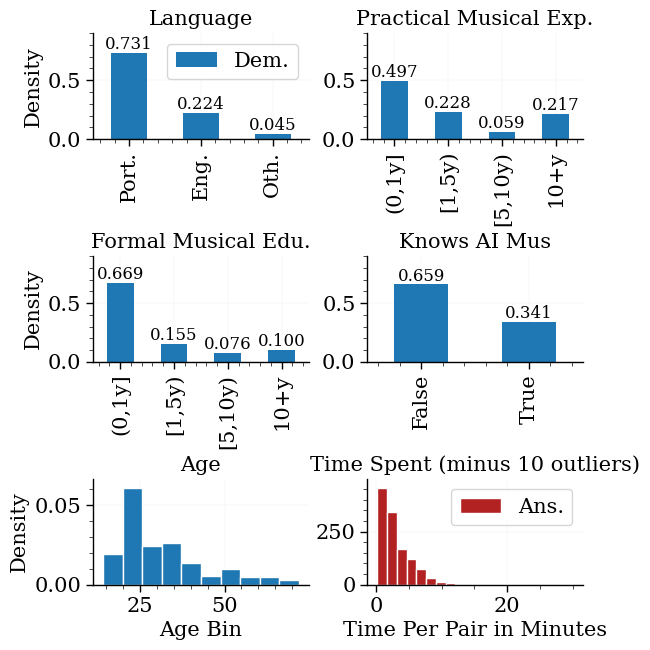

In [132]:
fig, axes = plt.subplots(3, 2, figsize=(6, 6 * (1.61 * 2/3)))
axes = axes.ravel()

df_user['lang_plot'] = 'Oth.'
df_user.loc[
    df_user['language'] == 'portuguese', 'lang_plot'
] = 'Port.'
df_user.loc[
    df_user['language'] == 'english', 'lang_plot'
] = 'Eng.'

(df_user['lang_plot'].
 value_counts(normalize=True).
 plot.bar(ax=axes[0], label='Dem.')
)


(df_user['practical_experience'].
 map(experience_trans).
 value_counts(normalize=True).
 sort_index().
 plot.bar(ax=axes[1], label='Dem.')
)

(df_user['formal_experience'].
 map(experience_trans).
 value_counts(normalize=True).
 sort_index().
 plot.bar(ax=axes[2], label='Dem.')
)

(df_user['age'].
 plot.hist(edgecolor='w', ax=axes[4], density=True, label='Dem.')
)

(df_user['knows_ai_music'].
 value_counts(normalize=True).
 sort_index().
 plot.bar(ax=axes[3], label='Dem.')
)

for i in [0, 1, 2, 3]:
    axes[i].set(
        ylim=(0, 0.9)
    )
for i in [0, 1, 2, 3, 4]:
    axes[i].set_xlabel(None)
axes[0].set_ylabel('Density')
axes[2].set_ylabel('Density')
axes[4].set_ylabel('Density')

axes[4].set_xlabel('Age Bin')

axes[0].set_title('Language')
axes[1].set_title('Practical Musical Exp.')
axes[2].set_title('Formal Musical Edu.')
axes[3].set_title('Knows AI Mus')
axes[4].set_title('Age')


import matplotlib.ticker as mtick
for ax in axes[:4]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=12)

new_x_labels = ['(0,1y]', '[1,5y)', '[5,10y)', '10+y']
axes[1].set_xticklabels(new_x_labels)
axes[2].set_xticklabels(new_x_labels)



((df_answer[['time_spent']]  / (1000 * 60)).
 sort_values(by='time_spent').iloc[:-5].
 rename(columns={'time_spent': 'Ans.'}).
 plot.hist(edgecolor='w', bins=20,  ax=axes[-1], color='firebrick'))

for ax in axes:
    # ax.tick_params(axis='x', labelrotation=75) 
    sns.despine(ax=ax)

axes[5].set_title('Time Spent (minus 10 outliers)')
axes[5].set_ylabel(None)
axes[5].set_xlabel('Time Per Pair in Minutes')


axes[0].legend()
axes[-1].legend()

fig.tight_layout(pad=0.5)

plt.savefig('users-t.pdf',bbox_inches='tight')

In [126]:
((df_answer[['time_spent']]  / (1000 * 60)).
 sort_values(by='time_spent').iloc[:-10]).describe()

,time_spent
count,1222.000000
mean,2.981275
std,2.508626
min,0.110733
25%,1.226458
50%,2.190925
75%,4.156842
max,18.457933


<Axes: ylabel='Frequency'>

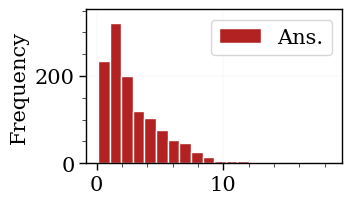

In [127]:
((df_answer[['time_spent']]  / (1000 * 60)).
 sort_values(by='time_spent').iloc[:-10].
 rename(columns={'time_spent': 'Ans.'}).
 plot.hist(edgecolor='w', bins=20, color='firebrick'))

In [128]:
df_user['age'].describe()

count    290.000000
mean      31.113793
std       12.765010
min       14.000000
25%       21.000000
50%       27.000000
75%       37.000000
max       72.000000
Name: age, dtype: float64

## Create a DataFrame where a is always the correct answer

In [129]:
def get_strd_df(df_answer):
    df_answer = df_answer.copy()
    data = {
        "Code": [0.0, 1.0, 2.0, 3.0, 4.0],
        "Meaning": [
            "neither",
            "a_ai",
            "b_ai",
            "both",
            "undecided"
        ]
    }
    
    df_code = pd.DataFrame(data).set_index('Code')['Meaning']

    df_songs = pd.read_csv('answers-july03rd/raw-songs-jul-3rd.csv')
    aiorh = df_songs[['name', 'type']].set_index('name')['type']

    df_answer.loc[:, 'resp'] = df_answer['human_perception'].map(df_code)
    df_answer.loc[:, 'a_type'] = df_answer['track_A'].map(aiorh)
    df_answer.loc[:, 'b_type'] = df_answer['track_B'].map(aiorh)

    df_a_ai = df_answer[df_answer['a_type'] == 'genai'].copy()
    df_b_ai = df_answer[df_answer['b_type'] == 'genai'].copy()

    # swap tracks so that A is always AI
    aux = df_b_ai['track_B'].copy()
    df_b_ai.loc[:, 'track_B'] = df_b_ai['track_A']
    df_b_ai.loc[:, 'track_A'] = aux
    
    # swap answers
    df_b_ai.loc[:, 'resp'] = df_b_ai['resp'].str.replace('a_ai', 'aux')
    df_b_ai.loc[:, 'resp'] = df_b_ai['resp'].str.replace('b_ai', 'a_ai')
    df_b_ai.loc[:, 'resp'] = df_b_ai['resp'].str.replace('aux', 'b_ai')
    
    df_b_ai.loc[:, 'a_type'] = 'genai'
    df_b_ai.loc[:, 'b_type'] = 'human'
    
    df_answer_strd = pd.concat((df_a_ai, df_b_ai))

    track_A_f = (df_answer_strd['track_A'].
             str.split('/', expand=True)[[2, 3]].T.
             ffill().T[[3]].
             rename(columns={3: 'track_A_f'})
    )

    track_B_f = (df_answer_strd['track_B'].
                 str.split('/', expand=True)[[2, 3]].T.
                 ffill().T[[3]].
                 rename(columns={3: 'track_B_f'})
    )
    
    df_answer_strd = pd.concat(
        (df_answer_strd, track_A_f, track_B_f),
        axis='columns'
    )
    return df_answer_strd

In [130]:
df_answer_strd = get_strd_df(df_answer)

## Simple Binomial Tests

In [22]:
def fraction(df, decided_only=True):
    from scipy.stats import binomtest
    df = df.copy()
    if decided_only:
        df = df[df['resp'].isin(['b_ai', 'a_ai'])]
    correct = 0
    correct += df[
        (df['resp'] == 'a_ai') & (df['a_type'] == 'genai')
    ].shape[0]
    # correct += df[
    #     (df['resp'] == 'b_ai') & (df['b_type'] == 'genai')
    # ].shape[0]
    if decided_only:
        p = 0.5
    else:
        p = 1 / 5
    return binomtest(
        correct,
        n = df.shape[0],
        p = p
    )

In [23]:
def general_exp(df, decided_only=True):
    print('CI overall')
    print(fraction(df, decided_only))
    print()

    print('CI rand')
    print(fraction(df[df['track_A'].str.contains('random')], decided_only))
    print()

    print('CI rq1')
    print(fraction(df[df['track_A'].str.contains('rq1')], decided_only))
    print()

In [24]:
general_exp(df_answer_strd)

CI overall
BinomTestResult(k=428, n=711, alternative='two-sided', statistic=0.6019690576652602, pvalue=6.009485732299534e-08)

CI rand
BinomTestResult(k=192, n=358, alternative='two-sided', statistic=0.5363128491620112, pvalue=0.1863281047818784)

CI rq1
BinomTestResult(k=236, n=353, alternative='two-sided', statistic=0.6685552407932012, pvalue=2.298470507446033e-10)



In [25]:
general_exp(df_answer_strd, False)

CI overall
BinomTestResult(k=428, n=1232, alternative='two-sided', statistic=0.3474025974025974, pvalue=1.733068280804316e-33)

CI rand
BinomTestResult(k=192, n=616, alternative='two-sided', statistic=0.3116883116883117, pvalue=5.7671001184388855e-11)

CI rq1
BinomTestResult(k=236, n=616, alternative='two-sided', statistic=0.38311688311688313, pvalue=1.4643035585060045e-25)



## Create the Bambi Dataframe

In [80]:
def create_bambi(df_answer_strd):
    df_answer_strd = df_answer_strd.copy()
    df_causal = (df_answer_strd.reset_index().merge(
        df_user,
        left_on='uuid',
        right_on='uuid'
    )[['id', 'uuid', 'uuid_order', 'time_spent', 'language', 'age',
       'practical_experience', 'formal_experience',
       'knows_ai_music', 'resp', 'pair_id']].
                 set_index('id').
                 sort_index().
                 copy()
    )
    
    df_causal.loc[
        :, 'choice_type'
    ] = 0.0
    df_causal.loc[
        df_causal['resp'].isin(['a_ai', 'b_ai']), 'choice_type'
    ] = 1
    df_causal.loc[
        df_causal['resp'].isin(['neither']), 'choice_type'
    ] = 2
    df_causal.loc[
        df_causal['resp'].isin(['both']), 'choice_type'
    ] = 3
    
    # df_causal['made_choice'] = df_causal['resp'].isin(['a_ai', 'b_ai']).astype(int)
    # df_causal = df_causal[
    #     df_causal['uuid'].isin(
    #         df_user[df_user['language'] == 'english']['uuid']
    #     )
    # ]
    df_causal.loc[:, 'is_pt'] = (df_causal['language'] == 'portuguese')
    df_causal.loc[:, 'y'] = (df_causal['resp'] == 'a_ai').astype(int)
    df_causal.loc[:, 't'] = df_answer_strd['track_B'].str.contains('rq1').astype(int)
    df_causal.loc[:, 'time_spent'] = np.log10(df_causal['time_spent'] + 1)

    df_causal = df_causal.drop(['language', 'resp'], axis='columns')

    return df_causal
df_causal = create_bambi(df_answer_strd)
df_causal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 0010dca0-3391-480c-bd3a-bbbbfbf0e4b8 to fff64ff8-6f98-4379-ab68-d71cc1cc181e
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uuid                  1160 non-null   object 
 1   uuid_order            1160 non-null   int64  
 2   time_spent            1160 non-null   float64
 3   age                   1160 non-null   float64
 4   practical_experience  1160 non-null   float64
 5   formal_experience     1160 non-null   float64
 6   knows_ai_music        1160 non-null   bool   
 7   pair_id               1160 non-null   int64  
 8   choice_type           1160 non-null   float64
 9   is_pt                 1160 non-null   bool   
 10  y                     1160 non-null   int64  
 11  t                     1160 non-null   int64  
dtypes: bool(2), float64(5), int64(4), object(1)
memory usage: 134.2+ KB


In [81]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import pandas2ri

importr('base')
importr('lme4')
importr('performance')

# Convert pandas DataFrame to R
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df = ro.conversion.py2rpy(df_causal)

# Assign to R global environment
ro.globalenv['df'] = r_df

In [84]:
frm = ("y ~ C(t) + "
       "C(is_pt) + "
       "C(practical_experience) + "
       "C(formal_experience) +"
       "C(knows_ai_music) + "
       "C(choice_type) + "
       "time_spent + "
       "age + "
       "(uuid_order|uuid) +"
       "(1|pair_id)"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glmer(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)

R callback write-console: boundary (singular) fit: see help('isSingular')
  
R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1:   
R callback write-console: In vcov.merMod(object, use.hessian = use.hessian) :  
R callback write-console: 
   
R callback write-console:  variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX
  
R callback write-console: 2:   
R callback write-console: In vcov.merMod(object, correlation = correlation, sigm = sig) :  
R callback write-console: 
   
R callback write-console:  variance-covariance matrix computed from finite-difference Hessian is
not positive definite or contains NA values: falling back to var-cov estimated from RX
  
R callback write-console: 
Correlation matrix not shown by default, as p = 15 > 12.
Use print(object, correlation=TRUE)  or
    vcov(object)        if you need it

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
y ~ C(t) + C(is_pt) + C(practical_experience) + C(formal_experience) +  
    C(knows_ai_music) + C(choice_type) + time_spent + age + (uuid_order |  
    uuid) + (1 | pair_id)
   Data: df

      AIC       BIC    logLik -2*log(L)  df.resid 
    823.8     919.9    -392.9     785.8      1141 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06703 -0.00041 -0.00003  0.42923  2.37316 

Random effects:
 Groups  Name        Variance Std.Dev. Corr 
 uuid    (Intercept) 1.61655  1.2714        
         uuid_order  0.08782  0.2963   -1.00
 pair_id (Intercept) 0.72767  0.8530        
Number of obs: 1160, groups:  uuid, 290; pair_id, 35

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.426e+01  6.114e+03  -0.004 0.996834    
C(t)1                     6.090e-01  3.702e-01   1.645 0.099942

R callback write-console: boundary (singular) fit: see help('isSingular')
  


Random effect variances not available. Returned R2 does not account for random effects.


R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1: Can't compute random effect variances. Some variance components equal
  zero. Your model may suffer from singularity (see `?lme4::isSingular`
  and `?performance::check_singularity`).
  Decrease the `tolerance` level to force the calculation of random effect
  variances, or impose priors on your random effects parameters (using
  packages like `brms` or `glmmTMB`). 
  
R callback write-console: 2: Random slopes not present as fixed effects. This artificially inflates
  the conditional random effect variances.
  Respecify the fixed effects structure of your model (add random slopes
  as fixed effects). 
  


# R2 for Mixed Models

  Conditional R2: NA
     Marginal R2: 0.967



In [82]:
frm = ("y ~ C(t) + "
       "C(is_pt) + "
       "C(practical_experience) + "
       "C(formal_experience) +"
       "C(knows_ai_music) + "
       "C(choice_type) + "
       "time_spent + "
       "uuid_order + "
       "age"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)




Call:
glm(formula = y ~ C(t) + C(is_pt) + C(practical_experience) + 
    C(formal_experience) + C(knows_ai_music) + C(choice_type) + 
    time_spent + uuid_order + age, family = binomial(link = "logit"), 
    data = df)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.138e+01  1.168e+03  -0.018 0.985391    
C(t)1                     5.824e-01  1.677e-01   3.474 0.000513 ***
C(is_pt)TRUE             -1.244e-01  2.092e-01  -0.595 0.551909    
C(practical_experience)1  3.836e-01  2.288e-01   1.677 0.093576 .  
C(practical_experience)2  8.397e-01  4.747e-01   1.769 0.076916 .  
C(practical_experience)3  1.024e+00  3.249e-01   3.152 0.001619 ** 
C(formal_experience)1    -1.810e-01  2.707e-01  -0.669 0.503664    
C(formal_experience)2    -9.898e-01  4.160e-01  -2.379 0.017337 *  
C(formal_experience)3    -6.305e-01  3.797e-01  -1.660 0.096817 .  
C(knows_ai_music)TRUE     7.811e-01  1.875e-01   4.166  3.1e-05 ***
C(choice_type)1 

In [85]:
frm = ("y ~ C(t) + "
       "C(is_pt) + "
       "C(formal_experience) +"
       "C(knows_ai_music) + "
       "C(choice_type) + "
       "time_spent + "
       "uuid_order +"
       "age "
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)


Call:
glm(formula = y ~ C(t) + C(is_pt) + C(formal_experience) + C(knows_ai_music) + 
    C(choice_type) + time_spent + uuid_order + age, family = binomial(link = "logit"), 
    data = df)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.201e+01  1.177e+03  -0.019 0.985078    
C(t)1                  5.756e-01  1.662e-01   3.463 0.000533 ***
C(is_pt)TRUE          -1.191e-01  2.068e-01  -0.576 0.564513    
C(formal_experience)1  1.524e-01  2.401e-01   0.635 0.525613    
C(formal_experience)2 -2.243e-01  3.018e-01  -0.743 0.457363    
C(formal_experience)3  1.107e-01  2.869e-01   0.386 0.699623    
C(knows_ai_music)TRUE  8.640e-01  1.844e-01   4.686 2.78e-06 ***
C(choice_type)1        1.989e+01  1.177e+03   0.017 0.986514    
C(choice_type)2       -1.412e-01  1.417e+03   0.000 0.999920    
C(choice_type)3       -2.698e-01  1.357e+03   0.000 0.999841    
time_spent             5.492e-01  2.324e-01   2.363 0.018114 *  
uuid_order     

In [86]:
frm = ("y ~ C(t) + "
       "C(is_pt) + "
       "C(practical_experience) + "
       "C(knows_ai_music) + "
       "C(choice_type) + "
       "time_spent + "
       "age + "
       "uuid_order"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)


Call:
glm(formula = y ~ C(t) + C(is_pt) + C(practical_experience) + 
    C(knows_ai_music) + C(choice_type) + time_spent + age + uuid_order, 
    family = binomial(link = "logit"), data = df)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.191e+01  1.177e+03  -0.019 0.985156    
C(t)1                     5.904e-01  1.670e-01   3.536 0.000406 ***
C(is_pt)TRUE             -1.210e-01  2.067e-01  -0.585 0.558283    
C(practical_experience)1  2.891e-01  2.096e-01   1.379 0.167871    
C(practical_experience)2  1.946e-01  3.639e-01   0.535 0.592745    
C(practical_experience)3  5.185e-01  2.245e-01   2.309 0.020941 *  
C(knows_ai_music)TRUE     7.658e-01  1.845e-01   4.151  3.3e-05 ***
C(choice_type)1           1.985e+01  1.177e+03   0.017 0.986545    
C(choice_type)2          -1.691e-01  1.417e+03   0.000 0.999905    
C(choice_type)3          -2.995e-01  1.357e+03   0.000 0.999824    
time_spent                5.078e-01  2.327e-

In [87]:
frm = ("y ~ C(t) + "
       "C(is_pt) + "
       "C(practical_experience) + "
       "C(formal_experience) +"
       "C(knows_ai_music) + "
       "C(choice_type) + "
       "time_spent + "
       "age + "
       "uuid_order"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)


Call:
glm(formula = y ~ C(t) + C(is_pt) + C(practical_experience) + 
    C(formal_experience) + C(knows_ai_music) + C(choice_type) + 
    time_spent + age + uuid_order, family = binomial(link = "logit"), 
    data = df)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.138e+01  1.168e+03  -0.018 0.985391    
C(t)1                     5.824e-01  1.677e-01   3.474 0.000513 ***
C(is_pt)TRUE             -1.244e-01  2.092e-01  -0.595 0.551909    
C(practical_experience)1  3.836e-01  2.288e-01   1.677 0.093576 .  
C(practical_experience)2  8.397e-01  4.747e-01   1.769 0.076916 .  
C(practical_experience)3  1.024e+00  3.249e-01   3.152 0.001619 ** 
C(formal_experience)1    -1.810e-01  2.707e-01  -0.669 0.503664    
C(formal_experience)2    -9.898e-01  4.160e-01  -2.379 0.017337 *  
C(formal_experience)3    -6.305e-01  3.797e-01  -1.660 0.096817 .  
C(knows_ai_music)TRUE     7.811e-01  1.875e-01   4.166  3.1e-05 ***
C(choice_type)1 

In [88]:
frm = ("y ~ C(t) + "
       # "C(is_pt) + "
       # "C(practical_experience) + "
       # "C(knows_ai_music) + "
       "C(choice_type) + "
       "time_spent + "
       # "age + "
       "uuid_order"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)


Call:
glm(formula = y ~ C(t) + C(choice_type) + time_spent + uuid_order, 
    family = binomial(link = "logit"), data = df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.208e+01  1.199e+03  -0.018 0.985308    
C(t)1            5.481e-01  1.605e-01   3.414 0.000639 ***
C(choice_type)1  1.998e+01  1.199e+03   0.017 0.986706    
C(choice_type)2 -1.787e-02  1.446e+03   0.000 0.999990    
C(choice_type)3 -8.559e-02  1.384e+03   0.000 0.999951    
time_spent       4.348e-01  2.185e-01   1.990 0.046644 *  
uuid_order       9.829e-03  6.719e-02   0.146 0.883697    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1499.58  on 1159  degrees of freedom
Residual deviance:  883.57  on 1153  degrees of freedom
AIC: 897.57

Number of Fisher Scoring iterations: 18


# R2 for Logistic Regression
  Tjur's R2: 0.406



In [89]:
frm = ("y ~ C(t) + "
       "C(is_pt) + "
      "C(formal_experience) + "

       "C(practical_experience) + "
       "C(knows_ai_music) +"
       # "C(choice_type) + "
       # "time_spent + "
       "age + "
       "uuid_order"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)


Call:
glm(formula = y ~ C(t) + C(is_pt) + C(formal_experience) + C(practical_experience) + 
    C(knows_ai_music) + age + uuid_order, family = binomial(link = "logit"), 
    data = df)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.253447   0.299964  -0.845  0.39815    
C(t)1                     0.325257   0.127047   2.560  0.01046 *  
C(is_pt)TRUE              0.158169   0.155844   1.015  0.31014    
C(formal_experience)1    -0.189189   0.193534  -0.978  0.32830    
C(formal_experience)2    -0.319974   0.288426  -1.109  0.26727    
C(formal_experience)3    -0.193225   0.276396  -0.699  0.48450    
C(practical_experience)1  0.356857   0.168948   2.112  0.03467 *  
C(practical_experience)2  0.360028   0.309057   1.165  0.24405    
C(practical_experience)3  0.636269   0.220987   2.879  0.00399 ** 
C(knows_ai_music)TRUE     0.551666   0.134397   4.105 4.05e-05 ***
age                      -0.024016   0.005835  -4.116 3.86e-05

In [90]:
frm = ("y ~ C(t) + "
       "uuid_order"
)

# Fit logistic mixed model in R
ro.r(f'''
model <- glm(
  {frm},
  data = df,
  family = binomial(link = "logit")
)
''')

# Print model summary
summary = ro.r('summary(model)')
print(summary)

r2 = ro.r('r2(model)')
print(r2)


Call:
glm(formula = y ~ C(t) + uuid_order, family = binomial(link = "logit"), 
    data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.50789    0.15831  -3.208  0.00134 **
C(t)1        0.31044    0.12399   2.504  0.01229 * 
uuid_order  -0.10998    0.05289  -2.079  0.03757 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1499.6  on 1159  degrees of freedom
Residual deviance: 1489.2  on 1157  degrees of freedom
AIC: 1495.2

Number of Fisher Scoring iterations: 4


# R2 for Logistic Regression
  Tjur's R2: 0.009

